<a id = "1"></a><h1 id="Salary Prediction with Machine Learning"><span class="label label-default" style="background-color:#f5c0c0; font-size:30px; 
color: Black; ">Smart Building System</span></h1>

# Context
This dataset is collected from 255 sensor time series, instrumented in 51 rooms in 4 floors of the Sutardja Dai Hall(SDH) at UC Berkeley. It can be used to investigate patterns in physical properties of a room in a building. Moreover, it can also be used for experiments relating to Internet-of-Things (IoT), sensor fusion network or time-series tasks. This dataset is suitable for both supervised (classification and regression) and unsupervised learning (clustering) tasks.

# Content
Each room includes 5 types of measurements: CO2 concentration, room air humidity, room temperature, luminosity, and PIR motion sensor data, collected over a period of one week from Friday, August 23, 2013 to Saturday, August 31, 2013. The PIR motion sensor is sampled once every 10 seconds and the remaining sensors are sampled once every 5 seconds. Each file contains the timestamps (in Unix Epoch Time) and actual readings from the sensor.

The passive infrared sensor (PIR sensor) is an electronic sensor that measures infrared (IR) light radiating from objects in its field of view, which measures the occupancy in a room. Approximately 6% of the PIR data is non-zero, indicating an occupied status of the room. The remaining 94% of the PIR data is zero, indicating an empty room.

# Acknowledgments
If you use the dataset, please consider citing the following paper:
Dezhi Hong, Quanquan Gu, Kamin Whitehouse. High-dimensional Time Series Clustering via Cross-Predictability. In AISTATS'17.


# Okay, let's start.

In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('./data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

./data\KETI\README.txt
./data\KETI\413\co2.csv
./data\KETI\413\humidity.csv
./data\KETI\413\light.csv
./data\KETI\413\pir.csv
./data\KETI\413\temperature.csv
./data\KETI\415\co2.csv
./data\KETI\415\humidity.csv
./data\KETI\415\light.csv
./data\KETI\415\pir.csv
./data\KETI\415\temperature.csv
./data\KETI\417\co2.csv
./data\KETI\417\humidity.csv
./data\KETI\417\light.csv
./data\KETI\417\pir.csv
./data\KETI\417\temperature.csv
./data\KETI\419\co2.csv
./data\KETI\419\humidity.csv
./data\KETI\419\light.csv
./data\KETI\419\pir.csv
./data\KETI\419\temperature.csv
./data\KETI\421\co2.csv
./data\KETI\421\humidity.csv
./data\KETI\421\light.csv
./data\KETI\421\pir.csv
./data\KETI\421\temperature.csv
./data\KETI\422\co2.csv
./data\KETI\422\humidity.csv
./data\KETI\422\light.csv
./data\KETI\422\pir.csv
./data\KETI\422\temperature.csv
./data\KETI\423\co2.csv
./data\KETI\423\humidity.csv
./data\KETI\423\light.csv
./data\KETI\423\pir.csv
./data\KETI\423\temperature.csv
./data\KETI\424\co2.csv
./data\K

In [10]:
df = pd.DataFrame()


for dirname, _, filenames in os.walk('./data'):
            
    if len(filenames) > 1:
        
        room_df = pd.DataFrame()

        room_id = dirname.split('/')[-1]
         
        print('Room ID: ', room_id)

        for i, filename in enumerate(filenames):
            
#             print(filename)
            
            feat_name = filename.split('.')[0]
            tmp_df = pd.read_csv(os.path.join(dirname, filename), names=[feat_name], header=0)        
            
            if i == 0:
                room_df = tmp_df
                
            else:

                room_df = pd.concat([room_df, tmp_df], axis=1, join="outer")
    
        room_df['room_ID'] = [room_id]*room_df.shape[0]
        
        df = pd.concat([df, room_df], axis=0)

Room ID:  data\KETI\413
Room ID:  data\KETI\415
Room ID:  data\KETI\417
Room ID:  data\KETI\419
Room ID:  data\KETI\421
Room ID:  data\KETI\422
Room ID:  data\KETI\423
Room ID:  data\KETI\424
Room ID:  data\KETI\442
Room ID:  data\KETI\446
Room ID:  data\KETI\448
Room ID:  data\KETI\452
Room ID:  data\KETI\454
Room ID:  data\KETI\456
Room ID:  data\KETI\458
Room ID:  data\KETI\462
Room ID:  data\KETI\510
Room ID:  data\KETI\511
Room ID:  data\KETI\513
Room ID:  data\KETI\552
Room ID:  data\KETI\554
Room ID:  data\KETI\556
Room ID:  data\KETI\558
Room ID:  data\KETI\562
Room ID:  data\KETI\564
Room ID:  data\KETI\621
Room ID:  data\KETI\621A
Room ID:  data\KETI\621C
Room ID:  data\KETI\621D
Room ID:  data\KETI\621E
Room ID:  data\KETI\640
Room ID:  data\KETI\644
Room ID:  data\KETI\648
Room ID:  data\KETI\656A
Room ID:  data\KETI\656B
Room ID:  data\KETI\664
Room ID:  data\KETI\666
Room ID:  data\KETI\668
Room ID:  data\KETI\717
Room ID:  data\KETI\719
Room ID:  data\KETI\721
Room ID:  

In [11]:
print("Shape: ", (df.count(), len(df.columns)))

Shape:  (co2             6573957
humidity        6571414
light           6571412
pir             3593902
temperature     6571454
room_ID        14381528
dtype: int64, 6)


In [12]:
df.head()

,co2,humidity,light,pir,temperature,room_ID
1377299108,495.00,45.34,97.00,NaN,23.94,data\KETI\413
1377299110,487.00,NaN,NaN,NaN,NaN,data\KETI\413
1377299127,496.00,NaN,NaN,0.00,NaN,data\KETI\413
1377299130,495.00,NaN,NaN,0.00,NaN,data\KETI\413
1377299134,500.00,NaN,NaN,NaN,NaN,data\KETI\413


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14381528 entries, 1377299108 to 1377948612
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   co2          float64
 1   humidity     float64
 2   light        float64
 3   pir          float64
 4   temperature  float64
 5   room_ID      object 
dtypes: float64(5), object(1)
memory usage: 768.1+ MB


In [14]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)
check_df(df)

##################### Shape #####################
(14381528, 6)
##################### Types #####################
co2            float64
humidity       float64
light          float64
pir            float64
temperature    float64
room_ID         object
dtype: object
##################### Head #####################
              co2  humidity  light  pir  temperature        room_ID
1377299108 495.00     45.34  97.00  NaN        23.94  data\KETI\413
1377299110 487.00       NaN    NaN  NaN          NaN  data\KETI\413
1377299127 496.00       NaN    NaN 0.00          NaN  data\KETI\413
1377299130 495.00       NaN    NaN 0.00          NaN  data\KETI\413
1377299134 500.00       NaN    NaN  NaN          NaN  data\KETI\413
##################### Tail #####################
            co2  humidity  light  pir  temperature        room_ID
1377565664  NaN       NaN    NaN  NaN        24.57  data\KETI\776
1377595353  NaN       NaN    NaN  NaN        22.15  data\KETI\776
1377597253  NaN       NaN    N

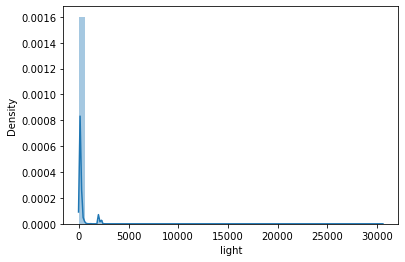

In [15]:
sns.distplot(df.light);

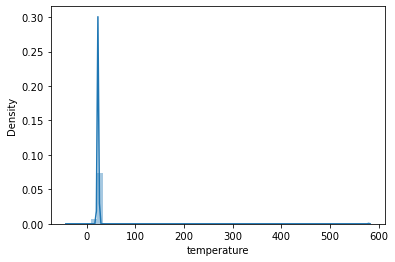

In [16]:
sns.distplot(df.temperature);

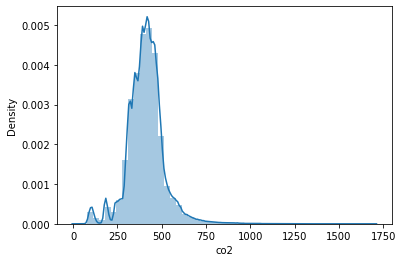

In [17]:
sns.distplot(df.co2);

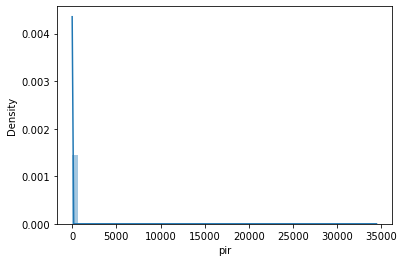

In [18]:
sns.distplot(df.pir);

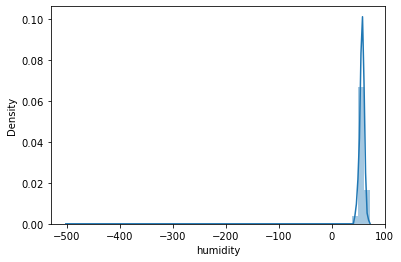

In [19]:
sns.distplot(df.humidity );

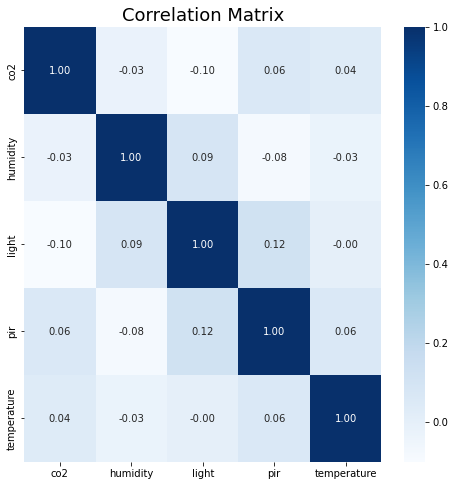

In [20]:
f, ax = plt.subplots(figsize= [8,8])
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap = "Blues" )
ax.set_title("Correlation Matrix", fontsize=18)
plt.show()

In [21]:
#Analysis of Categorical Variables

def grab_col_names(dataframe, cat_th=10, car_th=20):

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]

    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]

    cat_cols = cat_cols + num_but_cat

    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]

    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car


cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 14381528
Variables: 6
cat_cols: 0
num_cols: 5
cat_but_car: 1
num_but_cat: 0


In [22]:
df.isnull().values.any()

True

In [23]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")
    if na_name:
        return na_columns
missing_values_table(df, True)

               n_miss  ratio
pir          10787626  75.01
light         7810116  54.31
humidity      7810114  54.31
temperature   7810074  54.31
co2           7807571  54.29


['co2', 'humidity', 'light', 'pir', 'temperature']

In [24]:
df.isnull().sum()

co2             7807571
humidity        7810114
light           7810116
pir            10787626
temperature     7810074
room_ID               0
dtype: int64

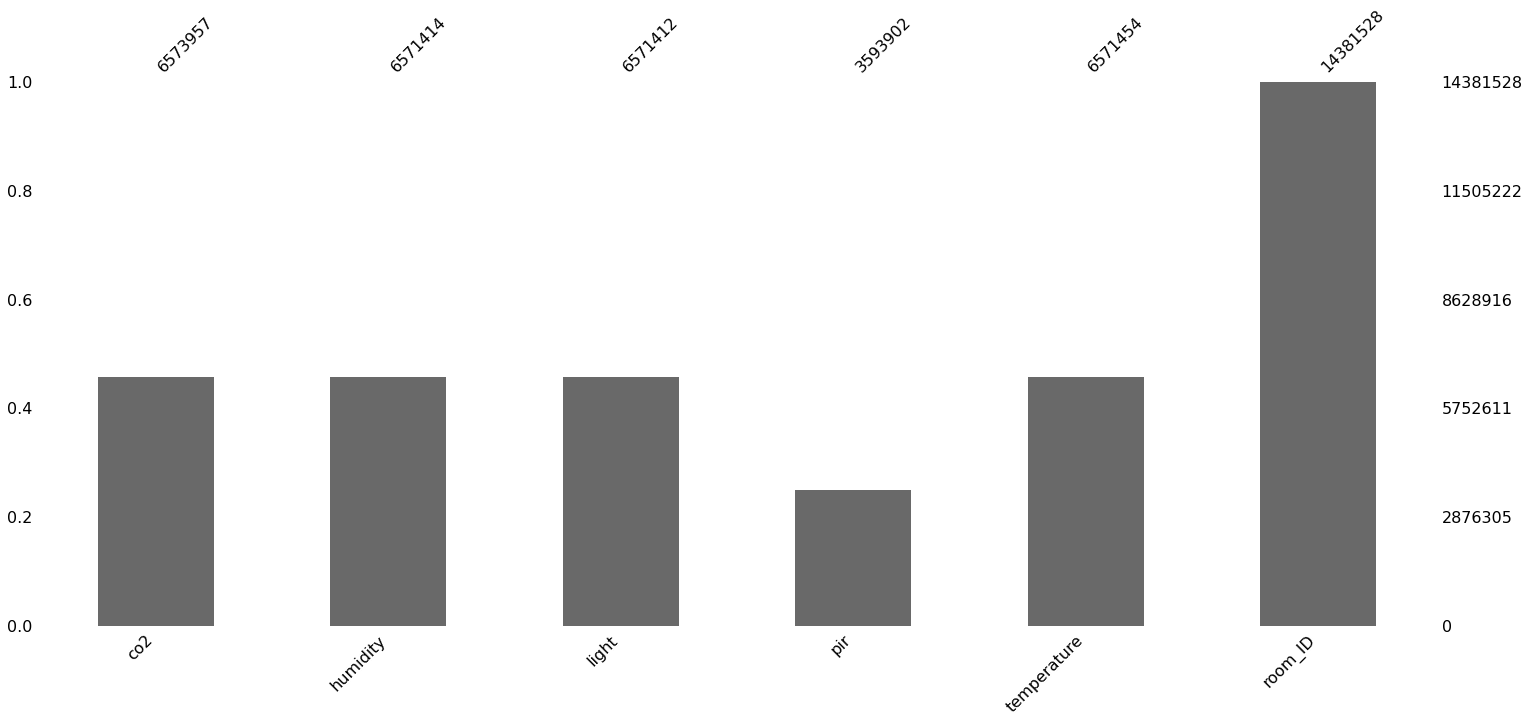

In [26]:
import missingno as msno
msno.bar(df);

In [27]:
df.dropna(inplace=True)
df

,co2,humidity,light,pir,temperature,room_ID
1377457084,459.00,52.75,103.00,0.00,23.48,data\KETI\413
1377457963,456.00,52.71,104.00,0.00,23.50,data\KETI\413
1377462175,446.00,52.43,105.00,0.00,23.54,data\KETI\413
1377464765,463.00,52.30,111.00,0.00,23.56,data\KETI\413
1377467333,458.00,52.21,159.00,0.00,23.65,data\KETI\413
...,...,...,...,...,...,...
1377965997,496.00,56.67,153.00,0.00,23.02,data\KETI\776
1377966724,504.00,56.42,157.00,0.00,23.16,data\KETI\776
1377968206,497.00,55.86,141.00,0.00,23.43,data\KETI\776
1377968924,508.00,55.73,129.00,0.00,23.55,data\KETI\776


In [28]:
df.isnull().sum()

co2            0
humidity       0
light          0
pir            0
temperature    0
room_ID        0
dtype: int64

In [29]:
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit
for col in num_cols:
    print(outlier_thresholds(df, col))

(-569.5, 1282.5)
(32.995, 80.555)
(-847.2249999999913, 1417.3749999999854)
(-34.5, 57.5)
(17.585, 29.065000000000005)


In [30]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False
for col in num_cols:
    print(col, check_outlier(df, col))

co2 False
humidity False
light True
pir False
temperature True


In [31]:
def grab_outliers(dataframe, col_name, index=False):
    low, up = outlier_thresholds(dataframe, col_name)
    if dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].shape[0] > 10:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].head())
    else:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))])

    if index:
        outlier_index = dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].index
        return outlier_index
for col in num_cols:
    grab_outliers(df, col)

Empty DataFrame
Columns: [co2, humidity, light, pir, temperature, room_ID]
Index: []
Empty DataFrame
Columns: [co2, humidity, light, pir, temperature, room_ID]
Index: []
              co2  humidity   light   pir  temperature        room_ID
1377299105 421.00     49.06 1977.00  0.00        24.81  data\KETI\668
1377299126 426.00     49.10 2208.00  0.00        24.81  data\KETI\668
1377299130 427.00     49.16 2267.00  0.00        24.80  data\KETI\668
1377302763 421.00     50.16 2351.00 30.00        24.21  data\KETI\668
1377302773 415.00     50.13 2347.00 29.00        24.20  data\KETI\668
Empty DataFrame
Columns: [co2, humidity, light, pir, temperature, room_ID]
Index: []
              co2  humidity  light   pir  temperature        room_ID
1377299363 725.00     53.03 142.00 30.00       579.27  data\KETI\419
1377299728 682.00     52.94 142.00 29.00       579.27  data\KETI\419
1377299748 698.00     52.94 144.00 27.00       579.27  data\KETI\419
1377299858 677.00     52.97 144.00 30.00       57

In [32]:
df.sort_values("pir",ascending = False)

,co2,humidity,light,pir,temperature,room_ID
1377739785,504.00,58.36,40.00,30.00,23.74,data\KETI\552
1377349211,442.00,54.45,19.00,30.00,22.27,data\KETI\419
1377445691,490.00,58.82,166.00,30.00,25.22,data\KETI\621
1377445731,498.00,58.88,162.00,30.00,25.24,data\KETI\621
1377445876,501.00,58.82,166.00,30.00,25.26,data\KETI\621
...,...,...,...,...,...,...
1377893746,449.00,60.98,13.00,0.00,22.63,data\KETI\513
1377893736,448.00,60.98,13.00,0.00,22.63,data\KETI\513
1377893726,439.00,60.98,13.00,0.00,22.63,data\KETI\513
1377893716,449.00,60.98,12.00,0.00,22.62,data\KETI\513


In [ ]:
df.to_csv("data.csv", index=False, encoding="utf-8")